# UE 4268 - EF4

**`TIEMGNI KENMOE GODWILL JEZREEL`**, `18E2352`, `jezreel.tiemgni@facsciences-uy1.cm` 


Department of Physics - Faculty of Science - University of Yaoundé I

`PNR (Physique Nucléaire et RadioActivité)`

`Avril 28, 2023`

# Evaluation formative 4 - Quantum Machine Learning

## Supervised learning

The basic structure of a supervised pattern recognition or prediction task can be formally defined as follows.

**Given an input domain $\mathcal{X}$ and an output domain $\mathcal{Y}$, a training data set $\mathcal{D} = \{(x^1,y^1),\ldots, (x^M,y^M)\}$ of training pairs $(x^m,y^m)\in\mathcal{X}\times\mathcal{Y}$ with $m = 1,\ldots, M$ of training inputs $x^m$ and target outputs $y^m$, as well as a new unclassified input $\tilde{x}\in\mathcal{X}$, guess or predict the corresponding output $\tilde{y}\in\mathcal{Y}$.**

The input domain $\mathcal{X}$ will mostly be chosen to be the space $\mathbb{R}^N$ of real N-dimensional vectors, or for binary variables, the space of N-bit binary strings $\{0, 1\}^N$. The input vectors are also called **feature vectors** as they represent information on carefully selected features of an instance. In cases where the raw data is not from a numerical domain or does not have an obvious distance measure between instances one has to first find a suitable representation that maps the elements to numerical values.



### Supervised pattern classification tasks in real-life applications

Complete the following sentences with **classification** and **regression**:

1. **`Regression`** is about finding a function to predict the relationship between
some input and the dependent continuous output value. Given you know the
income and the effective tax rates of your friends, can you estimate your tax
rate given your income even though you don't know the actual calculation?

2. In **`classification`**, we try to predict the discrete label of an instance. Given the
input and a set of possible labels, which one is it? 



In the table given below, which gives somes examples of supervised pattern classification tasks in real-life applications, specify in the third colum, the type of tasks by writing (1) for ***Binary classification tasks***; (2) for ***Regression tasks*** and (3) for ***Multi-label classification tasks***.

|Input| Output| Type of tasks
|:-----|:------|-------------|
|Last month's oil price| Tomorrow's oil price| (2) |
|Search history of a user|Chance to click on a car ad| (1) |
Insurance customer details| Chance of claiming| (2)|
|Images| Car, train or plane?| (3) |
|Recording of speech|Words contained in speech| (3) |
|Text segment| Prediction of next word to follow| (3) |
|Text| French or English?| (1) |
|Video| Contains a car?| (1) |
|Email| Is spam?| (1) |
|Spectrum of cancer cell| Malicious?| (1) |


### Life Cycle of a Machine Learning Project

Despite the diverse applications of machine learning, most machine learning projects follow a typical life cycle that includes some (or all) of the following steps : Visualize the data; Examine the data; Split the Dataset; Data Preprocessing; Load the data; Evaluate the models;  Train the Models.  Put that steps in the right order.
1. Examine the data
2. Visualize the data
3. Data Preprocessing
4. Split the Dataset
5. Load the data
6. Train the Models
7. Evaluate the models

### Sklearn 

**Sklearn** est la librairie qui contient toutes les fonctions de l’état de l'art du Machine Learning. On y trouve les algorithmes les plus importants ainsi que diverses fonctions de pre-processing. 

Avec Sklearn, il suffit d'écrire quelques lignes pour développer des modèles de ML supervisés. Pour un modèle de Support Vector Classifier (SVC) par exemple, les fonctions suivantes
 sont utiliser pour... (compléter le tableau, x et y étant respectivement les features et les labels/target)

|Fonction| pour ....   |
|--------|-------------|
|model = SVC()| créer une instance de Support Vector Classifier (SVC) et la sauvegarder dans la variable `model`|
|model.fit(x, y)| utiliser le SVC afin d'entraîner le modèle|
|model.score(x, y) | vérifier les performances (score) de notre modèle classique|
|model.predict(x) | faire des prédictions sur de nouveaux exemples. En d'autres termes, notre predict() prend en entrée les données de l'enchantillon (x) et renvoie la classe prédite pour cet enchantillon|

## Train a SMILES Dataset with Support Vector Regression

Use a support vector regression (SVR) to predict QED (quantitative estimation of drug-likeness) from molecules of the ZING Dataset contained in the file `'./Dataset/Zn10.txt`. The input - structural feature of molecules is Morgan fingerprint and the output is QED.

The workflow is
1. Get molecular fingerprints of each molecules 
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import where there needed**.

We recall that the **molecular fingerprint** represents the substructures of a molecule as a vector of binary numbers. It is a molecular structure descriptor use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

In [2]:
###
# Accédons à notre ensemble de données ZING préparé
###

#-- Importation du module nécéssaire
import os

#-- chargement des données
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/Zn10.txt')

### Exploration de nos données avec `Pandas Data Frame`

In [5]:
#-- Importation du module nécéssaire
import pandas as pd 

#-- Ouverture des données
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
#-- Conversion en dataframe
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

Smiles
0             NC(=O)C1CCCCC1C(F)(F)F
1               CCCCCNC(=O)N1CCCC1CO
2            CCC(CC)c1cc(C[NH3+])on1
3         C[NH2+]C1CCC(c2ccccc2Cl)C1
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...                              ...
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997         CCCC[NH2+]C1CCc2ccccc21
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C
5999        CCC(C)NC(=O)NCCC(=O)[O-]

[6000 rows x 1 columns]

### Notre table contient des SMILES que nous allons convertir en des molécules `RDKIT`

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d0e0>  
1     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d150>  
2     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d1c0>  
3     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d230>  
4     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d2a0>  
...                                                ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7f60cc359000>  
5996  <rdkit.Chem.rdchem.Mol object at 0x7f60cc359070>  
5997  <rdkit.Chem.rdchem.Mol object at 0x7f60cc3590e0>  
5998  <rdkit.Chem.rdchem.Mol object at 0x7f60cc359150>  
5999  <rdkit.Chem.rdchem.Mol object at 0x7f60cc3591c0>  

[6000 rows x 2 columns]
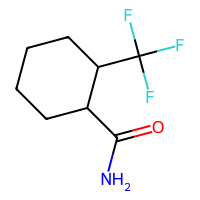
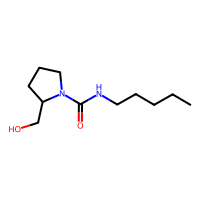
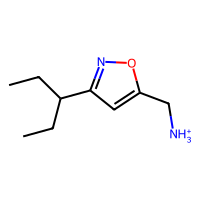
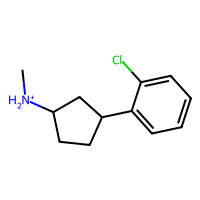
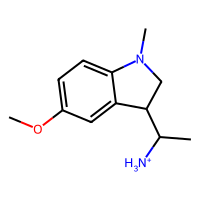
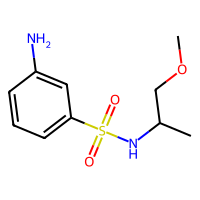
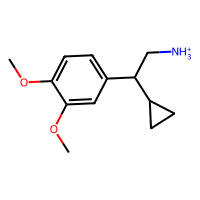
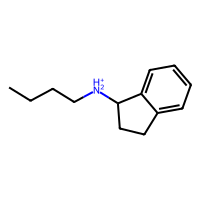
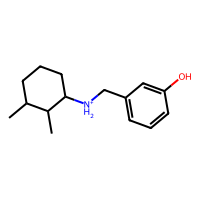
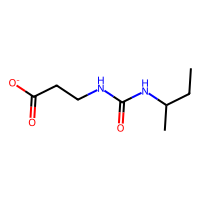

In [11]:
#-- Importation du module nécéssaire
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

In [12]:
#-- Vérifions s'il y a des lignes où RDKit n'a pas réussi à générer des molécules à partir de SMILES.
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [16]:
#-- Évaluons sur certains descripteurs, les propriétés physico-chimiques de nos composés.
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

#-- Conversion des descripteurs en dataFrame
descriptors_df = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df, descriptors_df], axis=1)
data

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules       MW    LogP  HBD  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d0e0>  195.184  1.8404    1   
1     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d150>  214.309  1.3429    2   
2     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d1c0>  169.248  1.3201    1   
3     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d230>  210.728  2.1693    1   
4     <rdkit.Chem.rdchem.Mol object at 0x7f60cc26d2a0>  207.297  0.8590    1   
...                                                ...      ...     ...  ...   
5995  <rdkit.Chem.rdchem.Mol object at 0x7f60cc359000>  244.316  0.5820    2   
5996  <rdkit.Chem.rdchem.Mol object at 0x7f60cc359070>  222.308  1.4393    1   
5997  <rdkit.Chem.rdchem.Mol object at 0x7f60cc3590e0>  190.310  2.0374    1   
5998  <rdkit.Chem.rdchem.Mol object at 0x7f60cc359150>  234.363  2.2803    2   
5999  <rdkit.Chem.rdchem.Mol object at 0x7f60cc3591c0>  187.219 -0.7759    2   

      HBA    PSA  Aromatic Rings  Rotatable Bonds       QED  
0       1  43.09               0                1  0.681153  
1       2  52.57               0                5  0.678579  
2       2  53.67               1                4  0.738657  
3       0  16.61               1                2  0.770859  
4       2  40.11               1                2  0.781030  
...   ...    ...             ...              ...       ...  
5995    4  81.42               1                5  0.742397  
5996    2  46.10               1                5  0.819062  
5997    0  16.61               1                4  0.699701  
5998    1  36.84               1                3  0.826891  
5999    3  81.26               0                5  0.592315  

[6000 rows x 10 columns]

In [20]:

#-- Importation du module nécéssaire
import numpy as np

#-- Évaluons l'empreinte de chaque molécule dans notre ensemble de données.
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)
    
#-- Conversion des empreintes en tableau
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

### Splitting du dataset

In [21]:
logp = data.iloc[:,3].values

In [22]:
#-- Nous vérifions d'abord que nos entrées/sorties ont le même nombre de lignes.
logp.shape[0] == fps.shape[0]

True

In [23]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

In [24]:
#-- Entraînement avec SVR
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [25]:
#-- Après entraînement, nous vérifions la précision de notre prédiction.
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print('The r2_score is {} '.format(r2),'and the mean square error is {}'.format(mse))

The r2_score is 0.8907400875892015  and the mean square error is 0.19215635860664254


### Visualisation des résulats de notre modèle

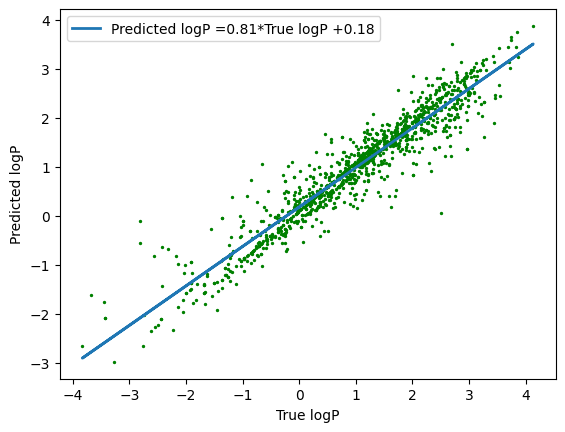

In [27]:
import matplotlib.pyplot as plt
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()